<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [50]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [51]:
# Start coding here! Use as many cells as you like
import numpy as np
M = np.random.randint(1, 101, size=25)
print(M)


[70 97 75 83 94 75 11 96 79 64 22 30 81 27  8 50 24 91 64 11 45 30 87 80
 82]


In [52]:
netflix_df.head()
netflix_df.isnull().sum()
netflix_df.drop_duplicates(inplace=True)

In [53]:
movie_90 = netflix_df[(netflix_df['release_year'] >= 1990) & 
                      (netflix_df['release_year'] <= 1999) & 
                      (netflix_df['type'].str.lower() == 'movie')]


1990    14
1991    14
1992    16
1993    16
1994    14
1995    16
1996    15
1997    26
1998    26
1999    26
Name: release_year, dtype: int64


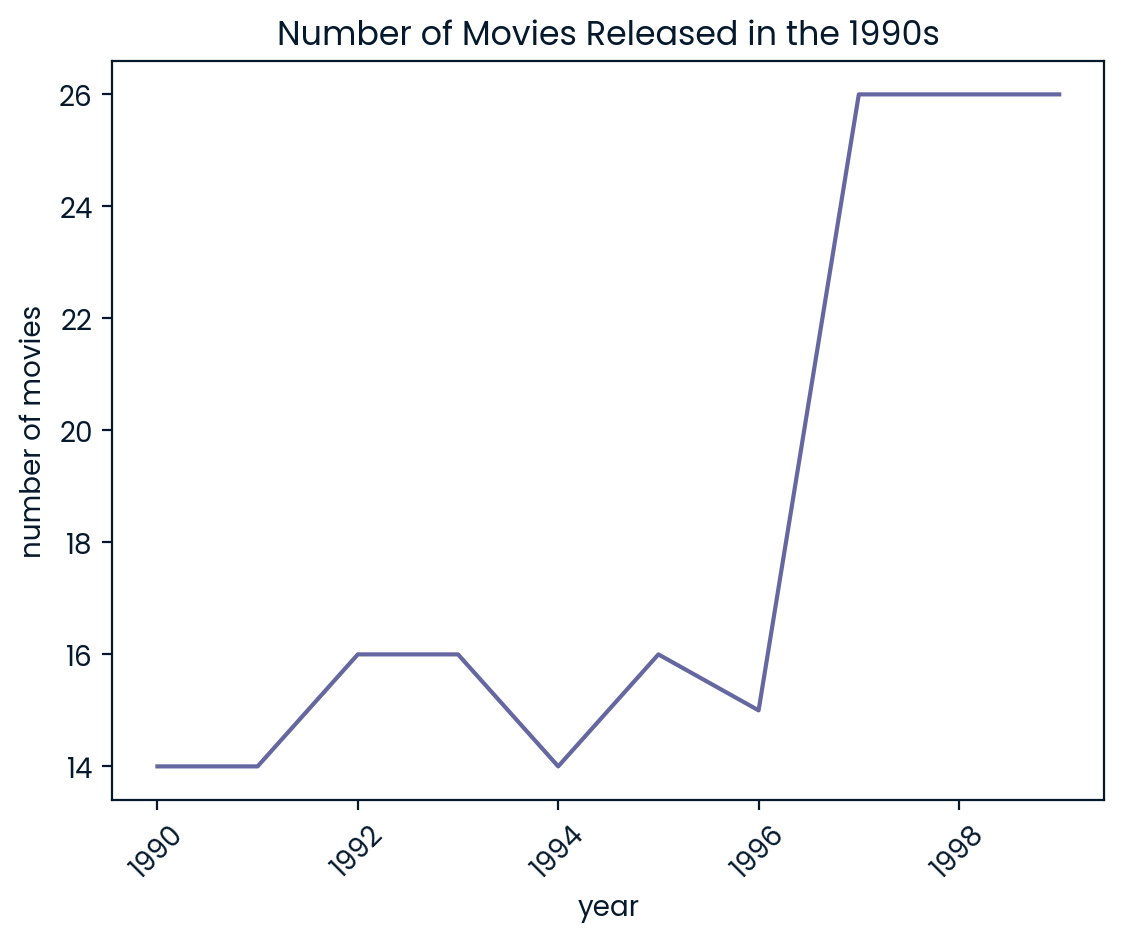

In [54]:
# Plot the number of movies released each year in the 1990s
movies_per_year = movie_90['release_year'].value_counts().sort_index()
print(movies_per_year)
plt.plot(movies_per_year.index,movies_per_year.values )
plt.title('Number of Movies Released in the 1990s')
plt.xlabel('year')
plt.ylabel('number of movies')
plt.xticks(rotation=45)
plt.show()


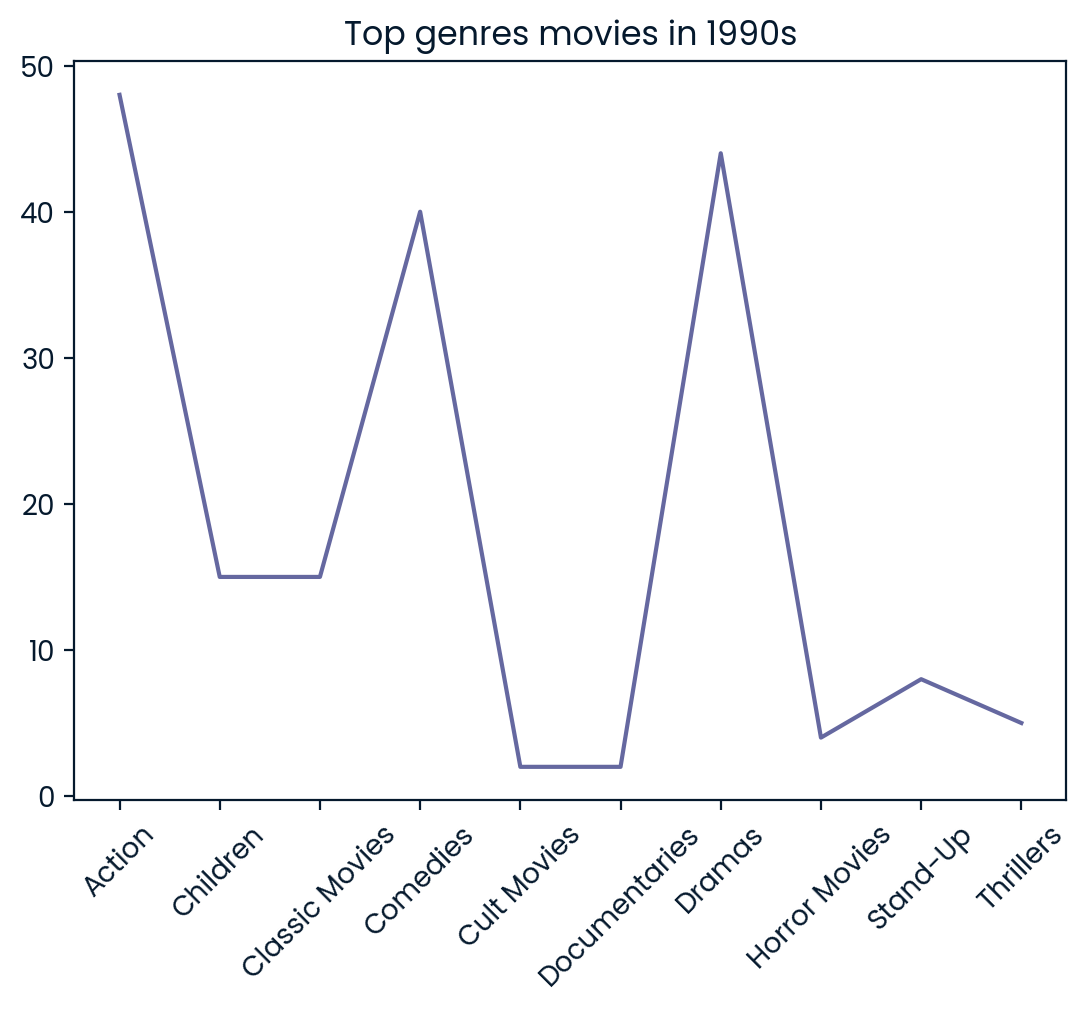

In [55]:
top_genres=movie_90['genre'].value_counts().sort_index()
plt.plot(top_genres.index,top_genres.values)
plt.title('Top genres movies in 1990s')
plt.xticks(rotation=45)
plt.show()

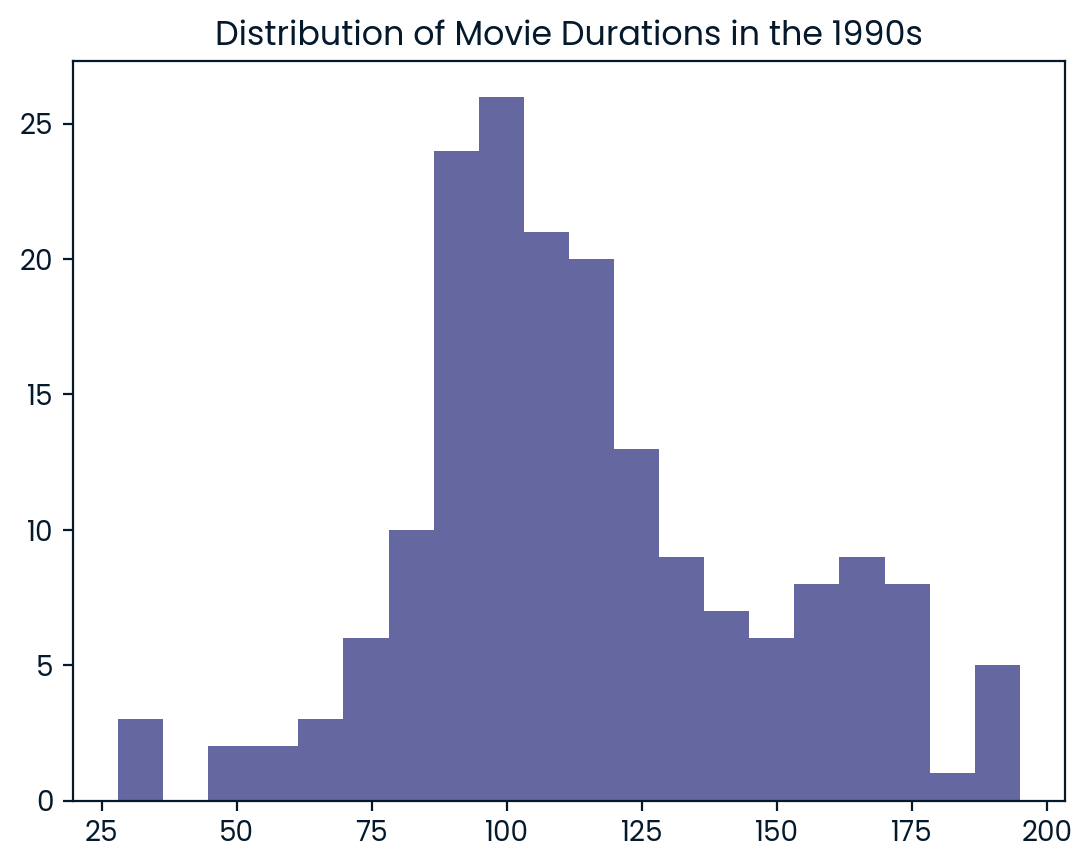

In [56]:
# Plot the distribution of movie durations
plt.hist(movie_90['duration'], bins=20)
plt.title('Distribution of Movie Durations in the 1990s')
plt.show()


Johnnie To            4
Youssef Chahine       3
Umesh Mehra           3
Gregory Hoblit        3
Subhash Ghai          3
Mahesh Bhatt          3
Rajkumar Santoshi     3
Sooraj R. Barjatya    3
David Dhawan          2
Quentin Tarantino     2
Name: director, dtype: int64


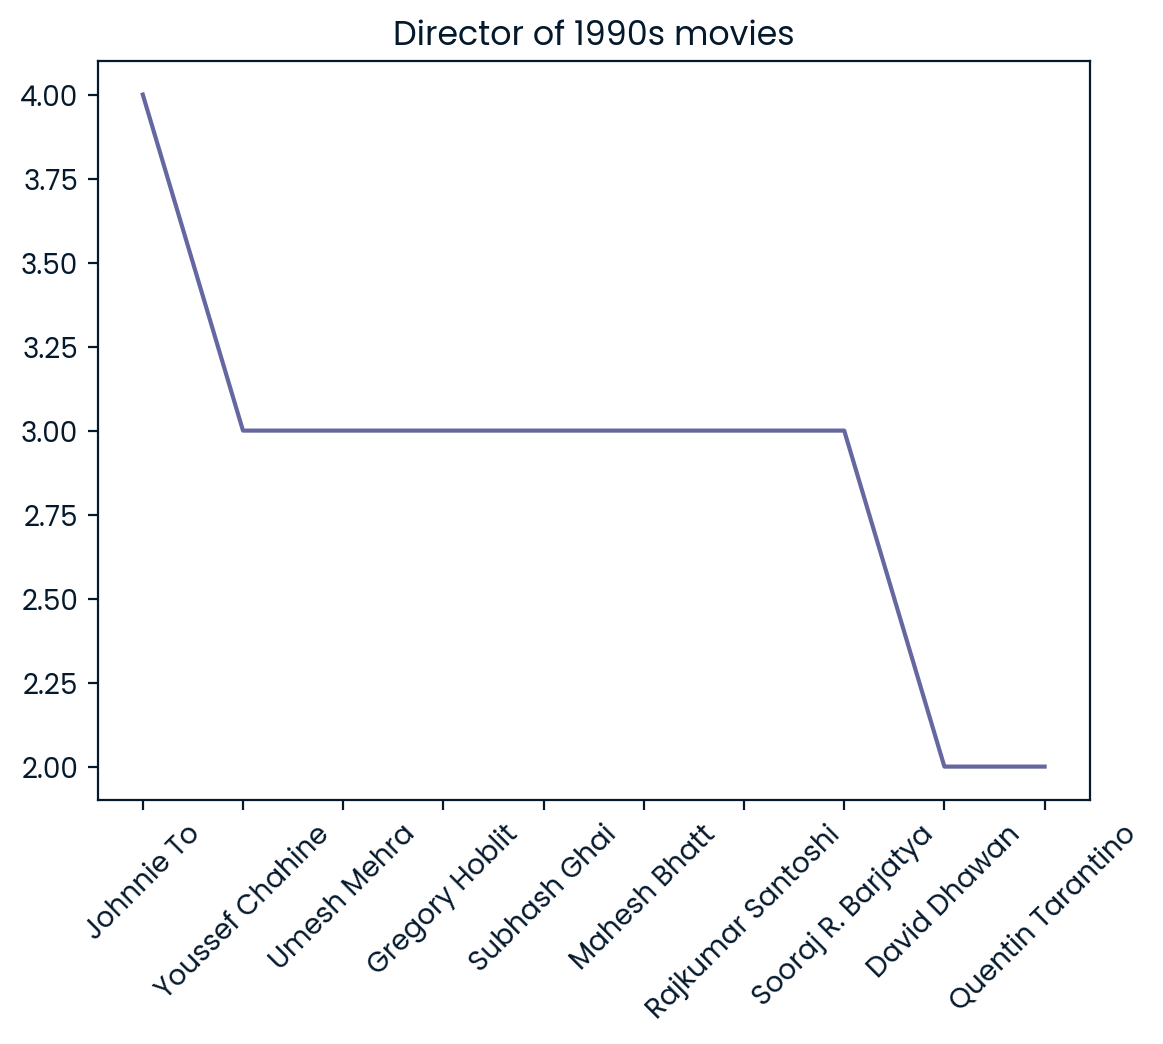

In [57]:
director_1990=movie_90['director'].value_counts().head(10)
print(director_1990)
plt.plot(director_1990.index,director_1990.values)
plt.title('Director of 1990s movies')
plt.xticks(rotation=45)
plt.show()


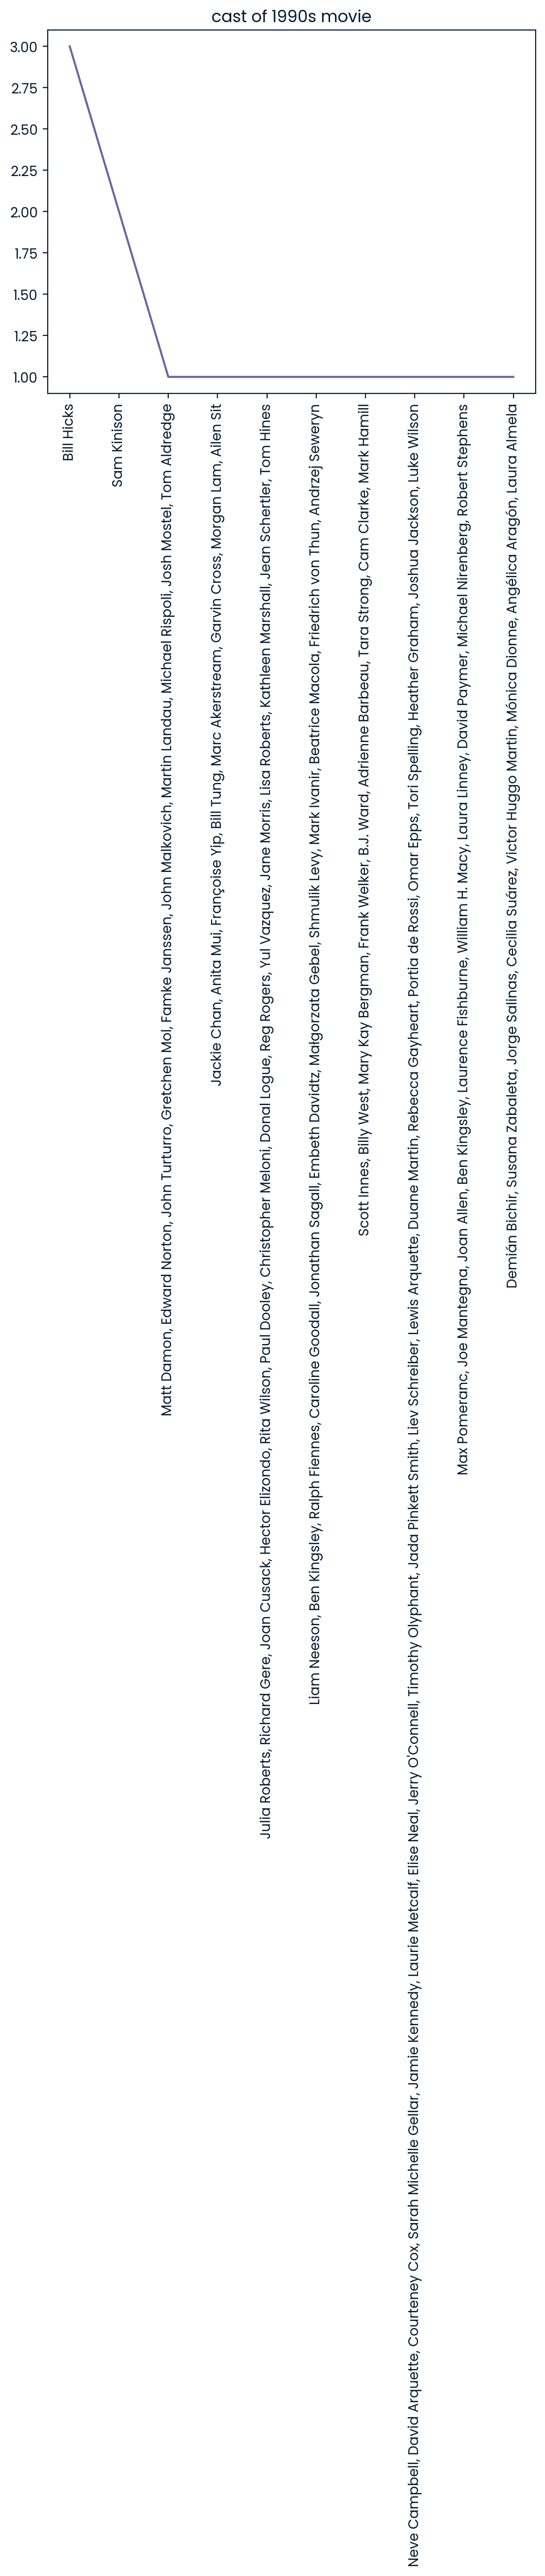

In [58]:
cast_1990=movie_90['cast'].value_counts().head(10)
plt.plot(cast_1990.index,cast_1990.values)
plt.title('cast of 1990s movie')
plt.xticks(rotation=90)
plt.show()

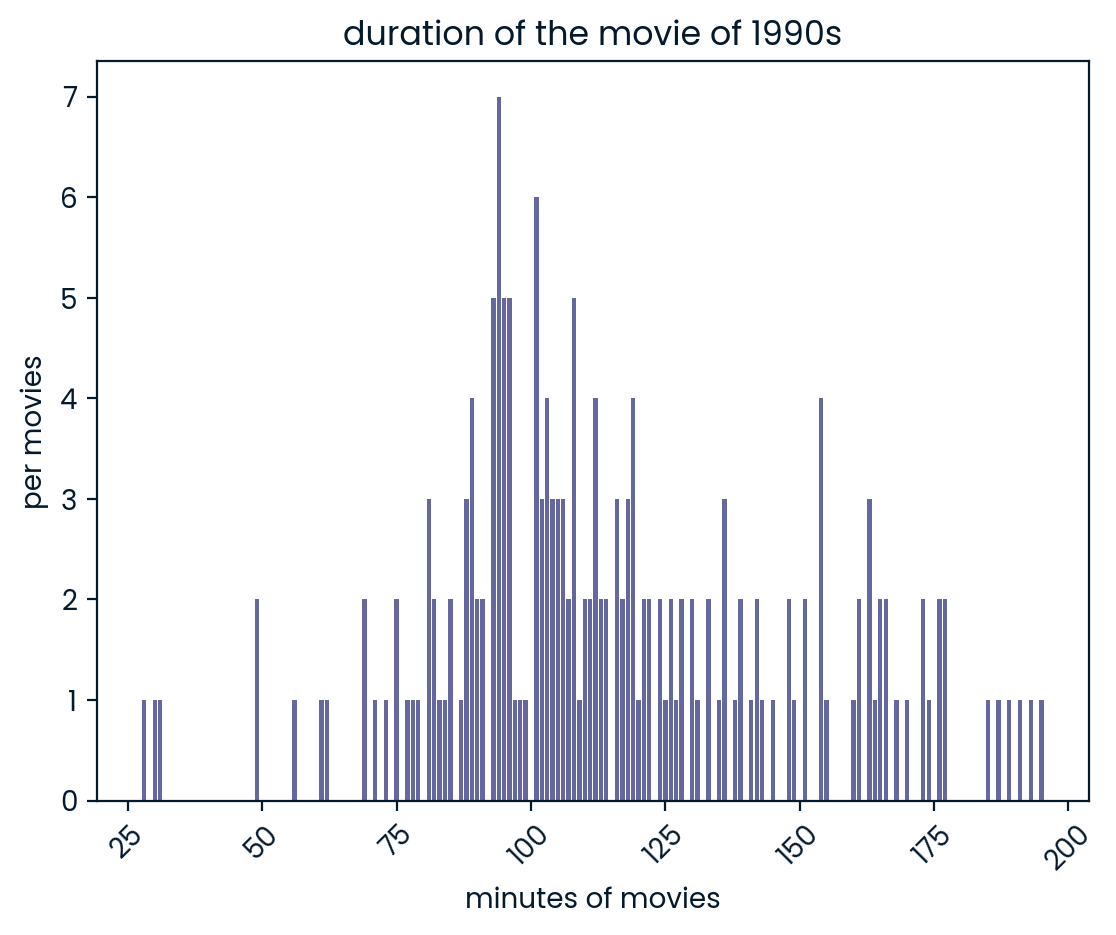

In [59]:
duration_1990=movie_90['duration'].value_counts().sort_index()
plt.bar(duration_1990.index,duration_1990.values)
plt.title('duration of the movie of 1990s')
plt.xlabel('minutes of movies')
plt.ylabel('per movies')

plt.xticks(rotation=45)
plt.show()

In [60]:


# Step 1: Filter action movies released in the 1990s
action_movies_90s = netflix_df[(netflix_df['type'] == 'Movie') & 
                       (netflix_df['release_year'] >= 1990) & 
                       (netflix_df['release_year'] <= 1999) & 
                       (netflix_df['genre'].str.contains('Action', case=False, na=False))]

# Step 2: Clean the 'duration' column to extract numeric values (in minutes)
action_movies_90s['duration'] = action_movies_90s['duration'].astype(str).str.extract('(\d+)').astype(float)

# Step 3: Filter movies with a duration less than 90 minutes (short movies)
short_action_movies = action_movies_90s[action_movies_90s['duration'] < 90]

# Step 4: Count the number of short action movies


short_movie_count_per_year = short_action_movies.groupby('release_year').size()
short_movie_count = short_movie_count_per_year.sum()

# Output the result
print(f"The number of short action movies in the 1990s is: {short_movie_count}")


The number of short action movies in the 1990s is: 7
